<a href="https://colab.research.google.com/github/Alisser2001/QuantumMachineLearning/blob/emmadev/LOFConcreteQML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

# URL del archivo raw en GitHub
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/concrete.dat"

# Descargar el contenido del archivo
response = requests.get(url)
lines = [line.strip() for line in response.text.splitlines()]

# Extraer atributos
attributes = [line.split()[1] for line in lines if line.startswith("@attribute")]

# Extraer datos (después de @data)
data_start = lines.index("@data") + 1
data = [line.split(",") for line in lines[data_start:] if line]

# Crear DataFrame
df = pd.DataFrame(data, columns=attributes).astype(float)

print(df.head())


       Cement  BlastFurnaceSlag      FlyAsh       Water  Superplasticizer  \
0  252.000000               0.0    0.000000  185.000000               0.0   
1  295.799988               0.0    0.000000  185.699997               0.0   
2  252.300003               0.0   98.800003  146.300003              14.2   
3  172.399994              13.6  172.399994  156.800003               4.1   
4  162.000000             214.0  164.000000  202.000000              10.0   

   CoarseAggregate  FineAggregate   Age  ConcreteCompressiveStrength  
0      1111.000000     784.000000   7.0                    13.710000  
1      1091.400024     769.299988   7.0                    14.840000  
2       987.799988     889.000000   3.0                    21.780001  
3      1006.299988     856.400024  28.0                    33.689999  
4       820.000000     680.000000  28.0                    30.650000  


In [2]:
# =========================
# SETUP: paleta 'pastel' (nativa de seaborn) — sin guardado de imágenes
# =========================
import math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

palette_name = "pastel"
sns.set_theme(style="whitegrid", context="notebook", palette=palette_name, font_scale=1.05)
pal = sns.color_palette(palette_name)

# colores explícitos extraídos de la paleta
color_main  = pal[2]    # para histogramas / puntos
color_kde   = pal[1]    # para KDE / líneas suaves
color_accent= pal[-1]   # para líneas de regresión o destaque
box_color   = pal[0]    # para boxplots inset

print("Paleta aplicada:", palette_name, " — Colores:", pal)


Paleta aplicada: pastel  — Colores: [(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274), (0.5529411764705883, 0.8980392156862745, 0.6313725490196078), (1.0, 0.6235294117647059, 0.6078431372549019), (0.8156862745098039, 0.7333333333333333, 1.0), (0.8705882352941177, 0.7333333333333333, 0.6078431372549019), (0.9803921568627451, 0.6901960784313725, 0.8941176470588236), (0.8117647058823529, 0.8117647058823529, 0.8117647058823529), (1.0, 0.996078431372549, 0.6392156862745098), (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


In [3]:
# Vista rápida de los datos
print("Dimensiones:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nDescripción estadística:")
display(df.describe().T)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nTipo de datos por columna:")
print(df.dtypes)

Dimensiones: (1030, 9)

Primeras filas:


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000



Descripción estadística:


,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.000000,192.375000,272.899994,350.000000,540.000000
BlastFurnaceSlag,1030.0,73.895825,86.279341,0.000000,0.000000,22.000000,142.950001,359.399994
FlyAsh,1030.0,54.188350,63.997004,0.000000,0.000000,0.000000,118.300003,200.100006
Water,1030.0,181.567281,21.354218,121.800003,164.899994,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.204660,5.973841,0.000000,0.000000,6.400000,10.200000,32.200001
CoarseAggregate,1030.0,972.918932,77.753955,801.000000,932.000000,968.000000,1029.400024,1145.000000
FineAggregate,1030.0,773.580484,80.175980,594.000000,730.950012,779.500000,824.000000,992.599976
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
ConcreteCompressiveStrength,1030.0,35.817961,16.705742,2.330000,23.710001,34.445002,46.135001,82.599998



Valores nulos por columna:
Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
dtype: int64

Tipo de datos por columna:
Cement                         float64
BlastFurnaceSlag               float64
FlyAsh                         float64
Water                          float64
Superplasticizer               float64
CoarseAggregate                float64
FineAggregate                  float64
Age                            float64
ConcreteCompressiveStrength    float64
dtype: object


confirmamos que no hay valores nulos y que todos son números, por lo tanto no es necesario pensar en una transformación ni en una imputación de datos

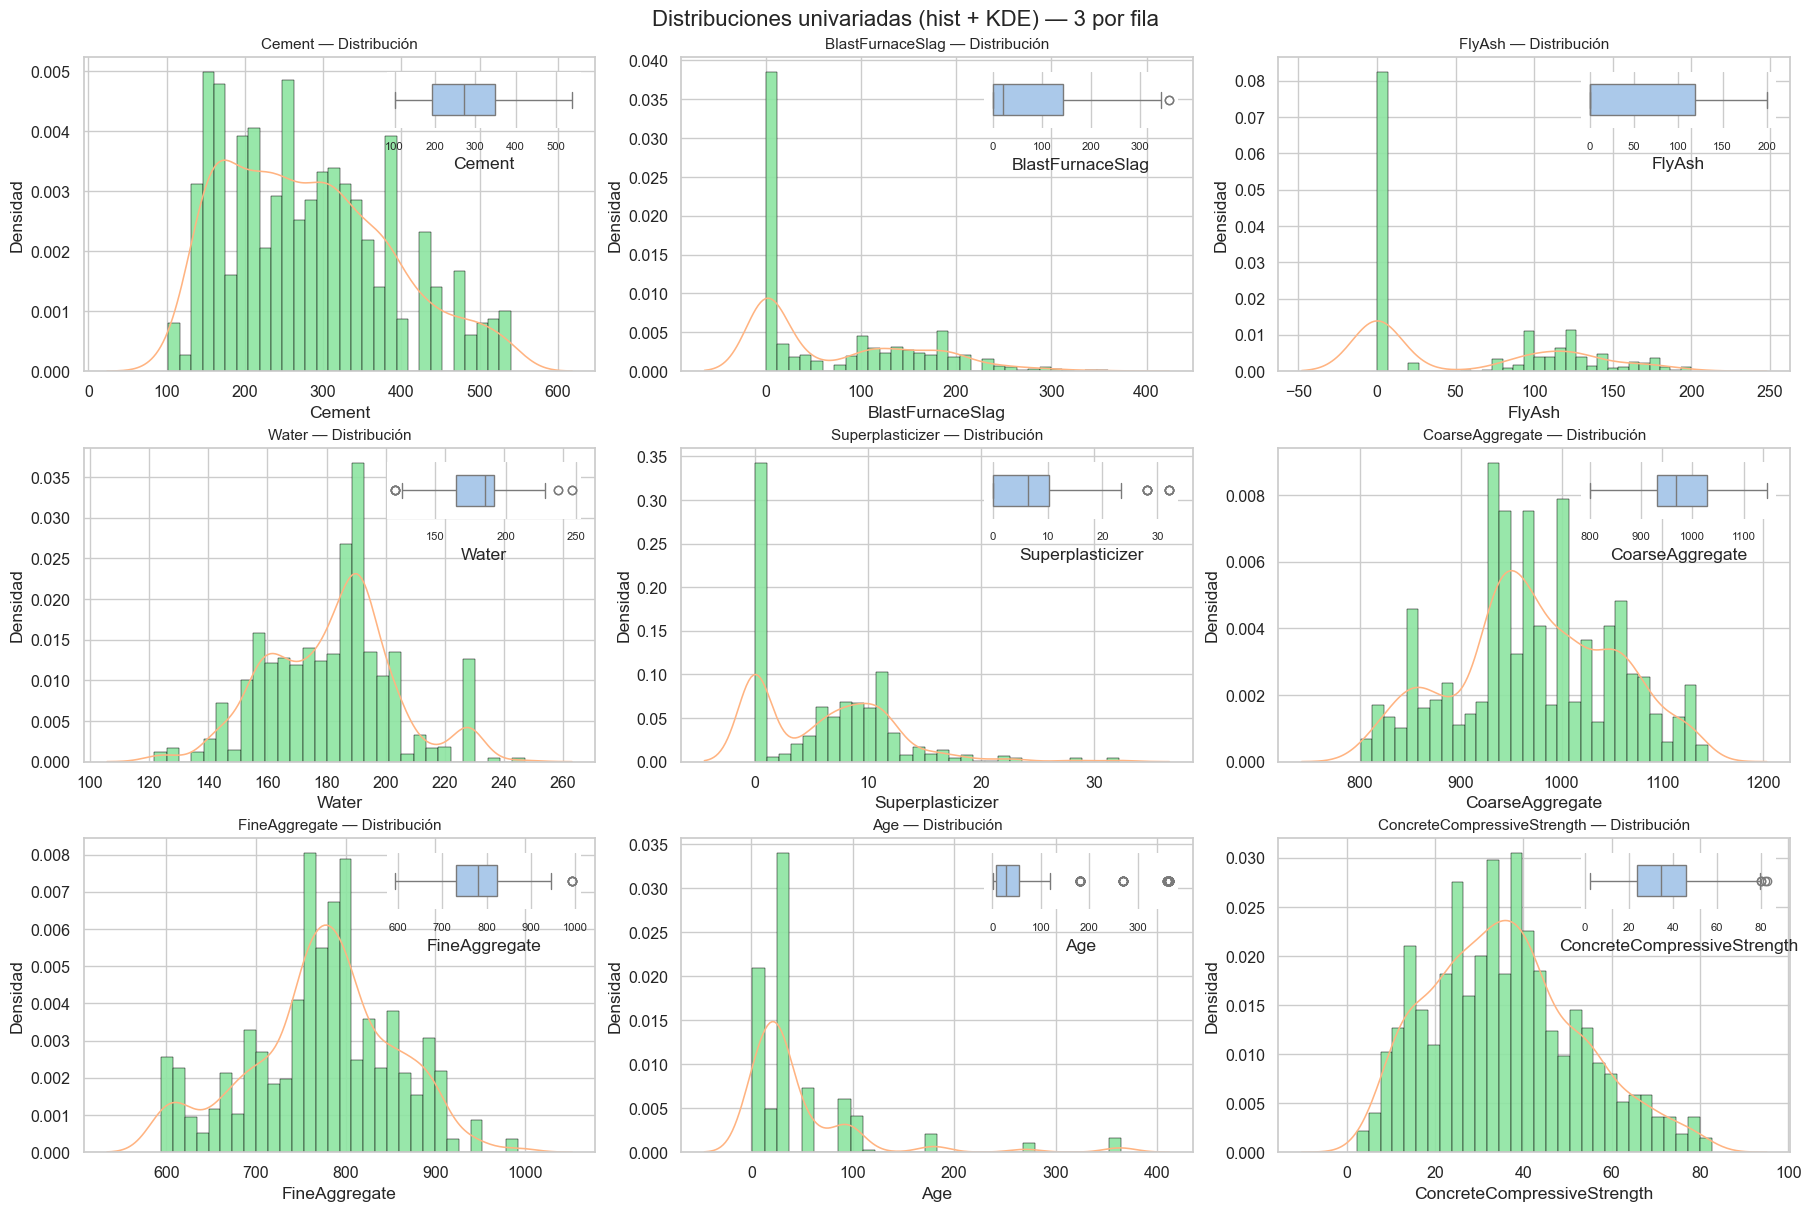

In [4]:
cols = df.columns.tolist()
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")

    axins = inset_axes(ax, width="38%", height="18%", loc='upper right', borderpad=0.9)
    sns.boxplot(x=df[col], ax=axins, orient="h", width=0.55, color=box_color)
    axins.set_yticks([])
    axins.tick_params(axis='both', which='both', labelsize=8)
    for spine in axins.spines.values():
        spine.set_visible(False)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])


fig.suptitle("Distribuciones univariadas (hist + KDE) — 3 por fila", fontsize=16)

plt.show()


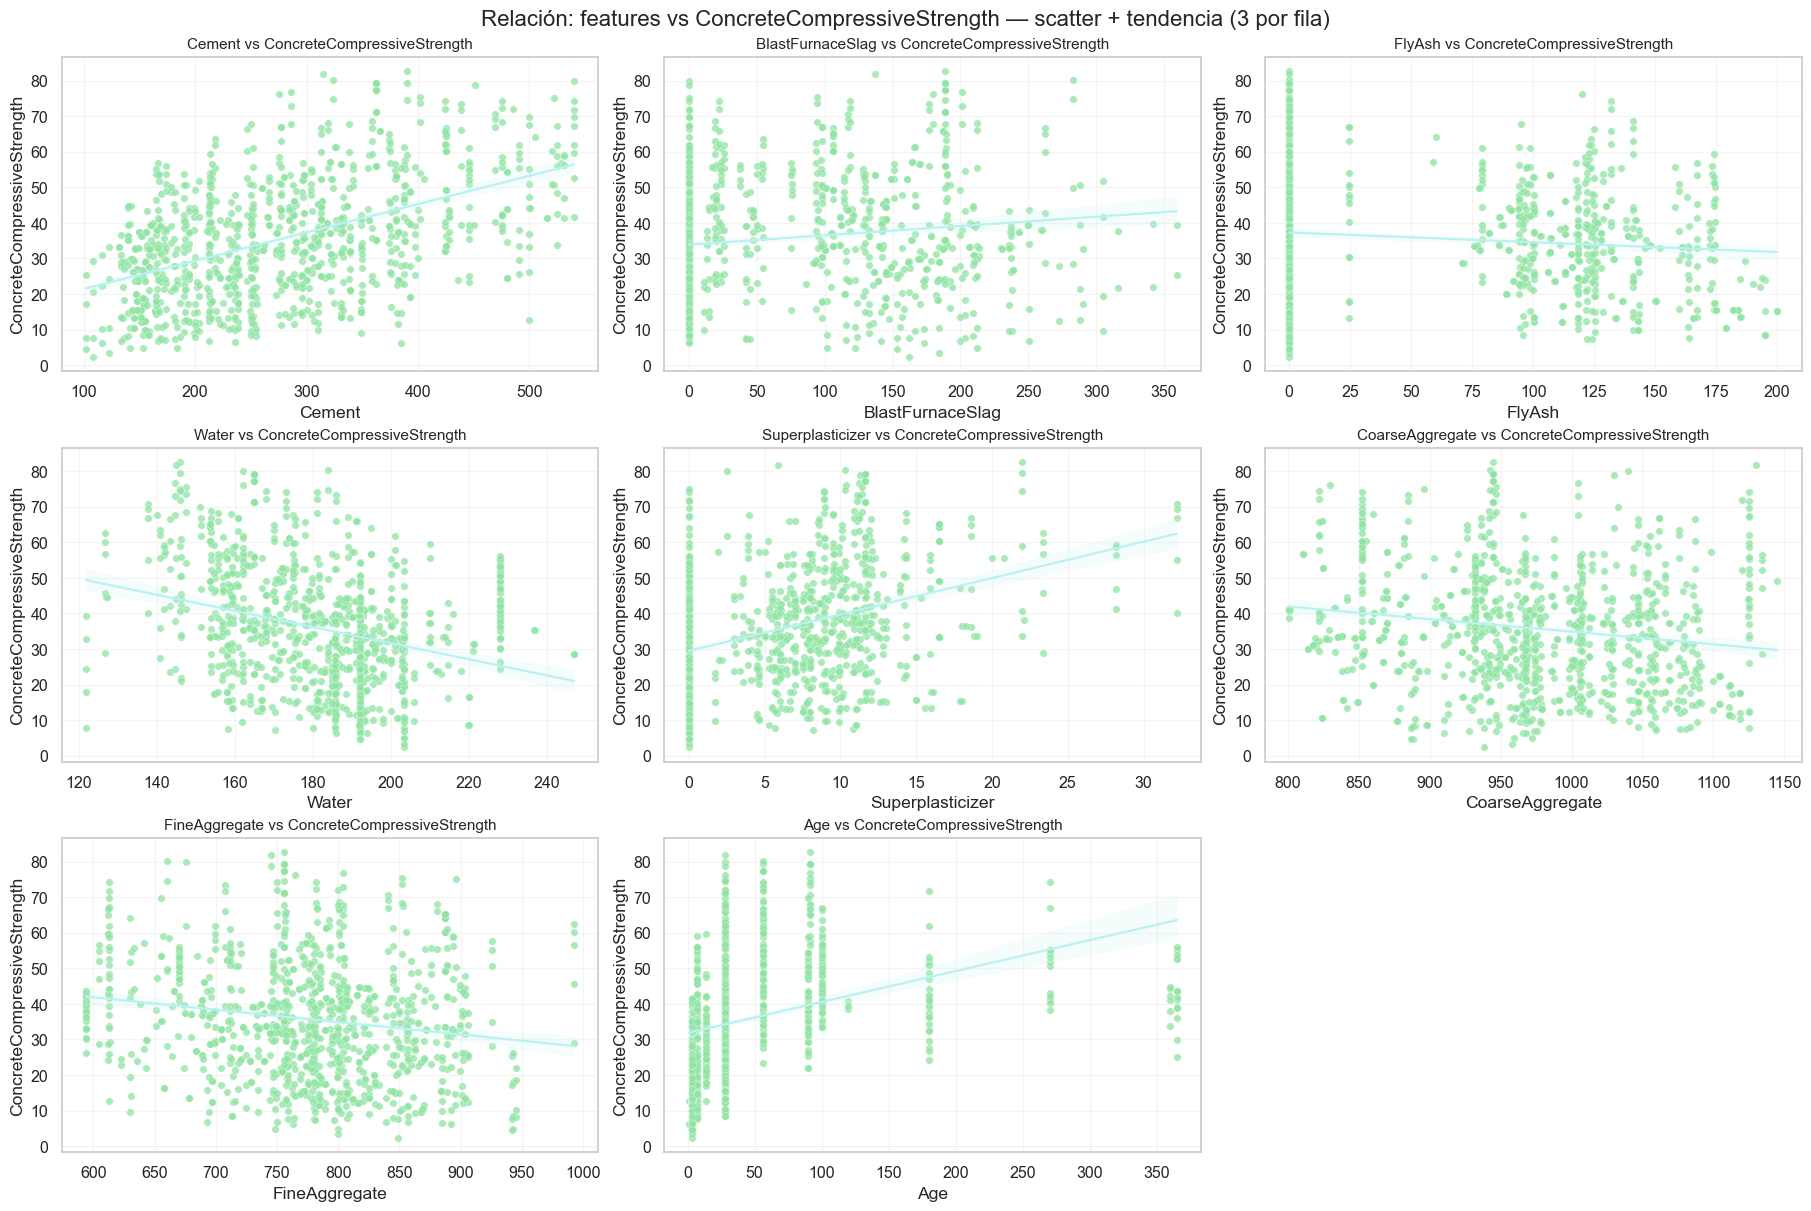

In [5]:
target = "ConcreteCompressiveStrength"
features = [c for c in df.columns if c != target]
n = len(features)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.scatterplot(x=df[feat], y=df[target], ax=ax,
                    color=color_main, edgecolor="w", linewidth=0.25, s=28, alpha=0.75)
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, truncate=True,
                line_kws={"linewidth":1.6, "color": color_accent})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.grid(alpha=0.2)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle(f"Relación: features vs {target} — scatter + tendencia (3 por fila)", fontsize=16)
plt.show()


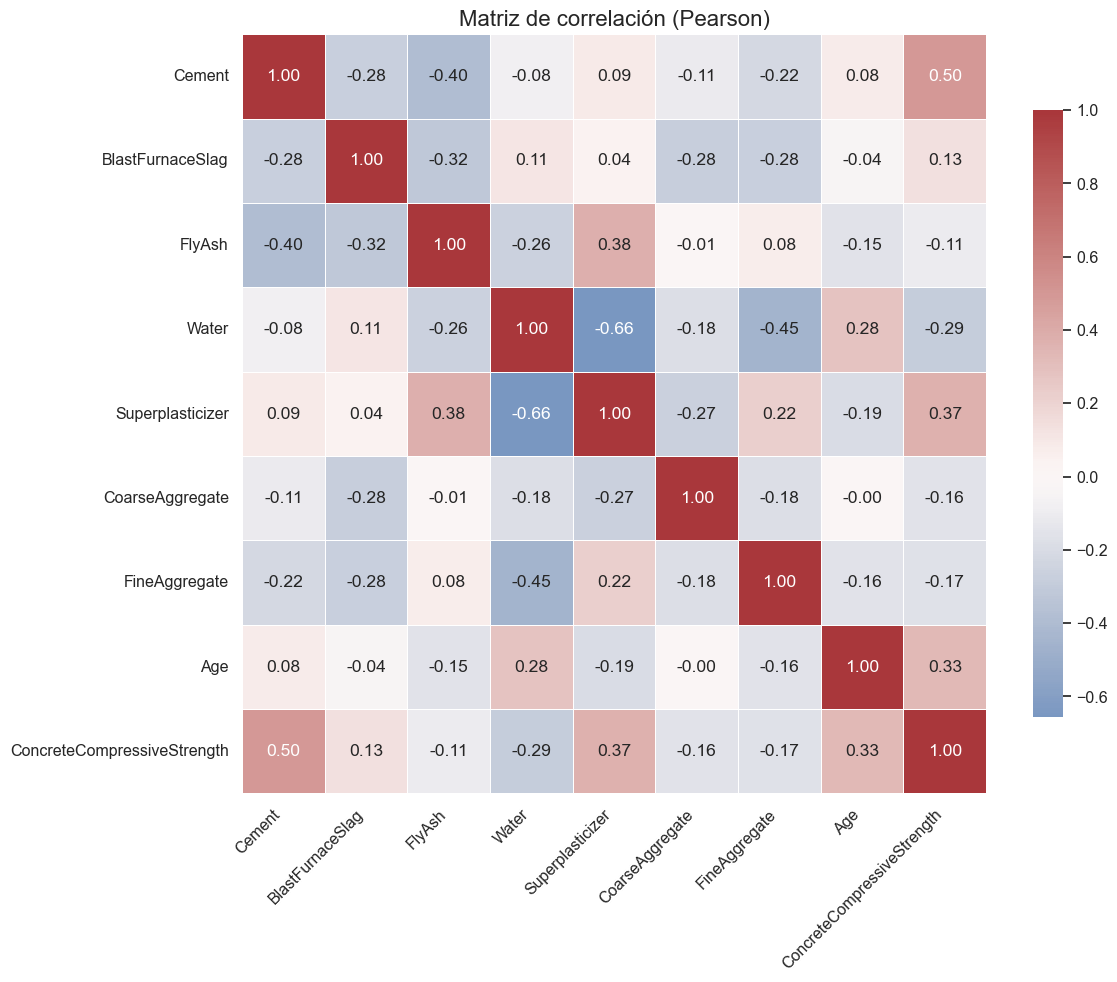


Correlación con la variable objetivo (orden descendente):


ConcreteCompressiveStrength    1.000000
Cement                         0.497832
Superplasticizer               0.366079
Age                            0.328873
BlastFurnaceSlag               0.134829
FlyAsh                        -0.105755
CoarseAggregate               -0.164935
FineAggregate                 -0.167241
Water                         -0.289633
Name: ConcreteCompressiveStrength, dtype: float64

In [6]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths=0.5, cbar_kws={"shrink":0.8})
plt.title("Matriz de correlación (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelación con la variable objetivo (orden descendente):")
display(corr[target].sort_values(ascending=False))





---



In [7]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [8]:

# Parámetros
features = df.columns.tolist()  # lista explícita
n_neighbors = 20               # n_neighbors de LOF
contamination = 0.05           # fracción esperada de outliers

X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Ajustar LOF
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=False)
y_pred = lof.fit_predict(X_scaled)  # 1 -> inlier, -1 -> outlier
neg_lof_scores = lof.negative_outlier_factor_  # valores negativos: más negativo = más atípico
# convertimos a score positivo (cuanto mayor, más atípico)
lof_score = -neg_lof_scores

In [9]:
# Añadir columnas al DataFrame original (no escala)
df = df.copy()  # evitar modificar df original fuera del scope
df["lof_score"] = lof_score
df["is_outlier"] = y_pred == -1

# 4) Resumen rápido
n_outliers = df["is_outlier"].sum()
print(f"Total de muestras: {len(df)}")
print(f"Outliers detectados (is_outlier=True): {n_outliers}  —  Contamination usado: {contamination}")

# Mostrar top N más atípicos (por lof_score)
top_n = 10
print(f"\nTop {top_n} muestras más atípicas (por lof_score):")
display(df.sort_values("lof_score", ascending=False).head(top_n))

# 5) Visualizaciones: univariadas y bivariadas con outliers destacados
cols = features
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

Total de muestras: 1030
Outliers detectados (is_outlier=True): 52  —  Contamination usado: 0.05

Top 10 muestras más atípicas (por lof_score):


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength,lof_score,is_outlier
161,500.000000,0.000000,0.000000,200.000000,0.0,1125.000000,613.000000,1.0,12.640000,1.757744,True
357,485.000000,0.000000,0.000000,146.000000,0.0,1120.000000,800.000000,28.0,71.989998,1.727267,True
44,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,3.0,7.750000,1.699733,True
290,522.000000,0.000000,0.000000,146.000000,0.0,896.000000,896.000000,7.0,50.509998,1.584796,True
105,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,14.0,17.820000,1.578456,True
754,313.000000,0.000000,0.000000,178.000000,8.0,1000.000000,822.000000,28.0,25.100000,1.575527,True
298,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,56.0,32.849998,1.571086,True
557,312.700012,0.000000,0.000000,178.100006,8.0,999.700012,822.200012,28.0,25.100000,1.569516,True
786,436.000000,0.000000,0.000000,218.000000,0.0,838.400024,719.700012,28.0,23.850000,1.566211,True
815,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,100.0,39.230000,1.545307,True


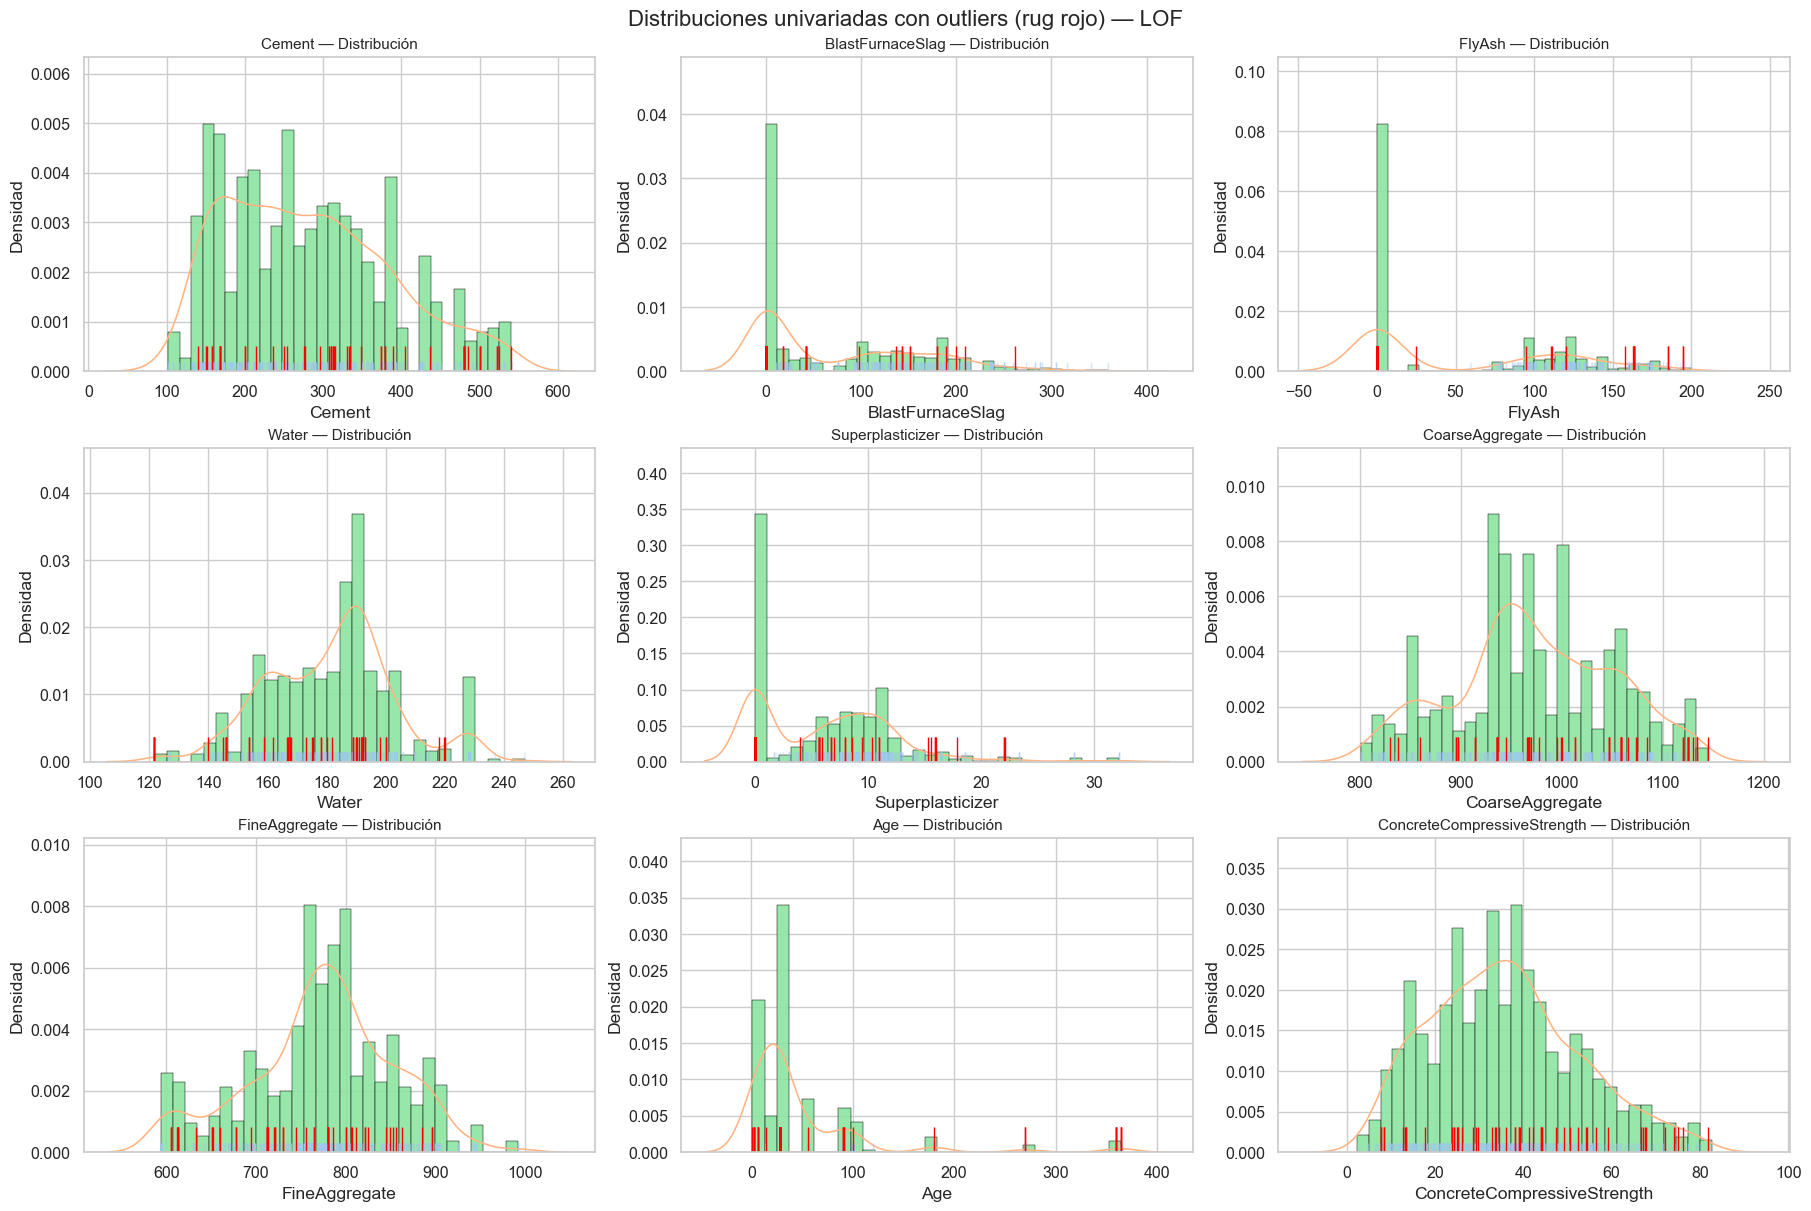

In [10]:

# Distribuciones univariadas: hist + KDE + rug con outliers en rojo
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15, fill=False)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")
    # rug para inliers (sutil)
    sns.rugplot(df.loc[~df["is_outlier"], col], ax=ax, height=0.03, alpha=0.25)
    # rug para outliers (destacado en rojo)
    sns.rugplot(df.loc[df["is_outlier"], col], ax=ax, height=0.08, color="red")


for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Distribuciones univariadas con outliers (rug rojo) — LOF", fontsize=16)
plt.show()

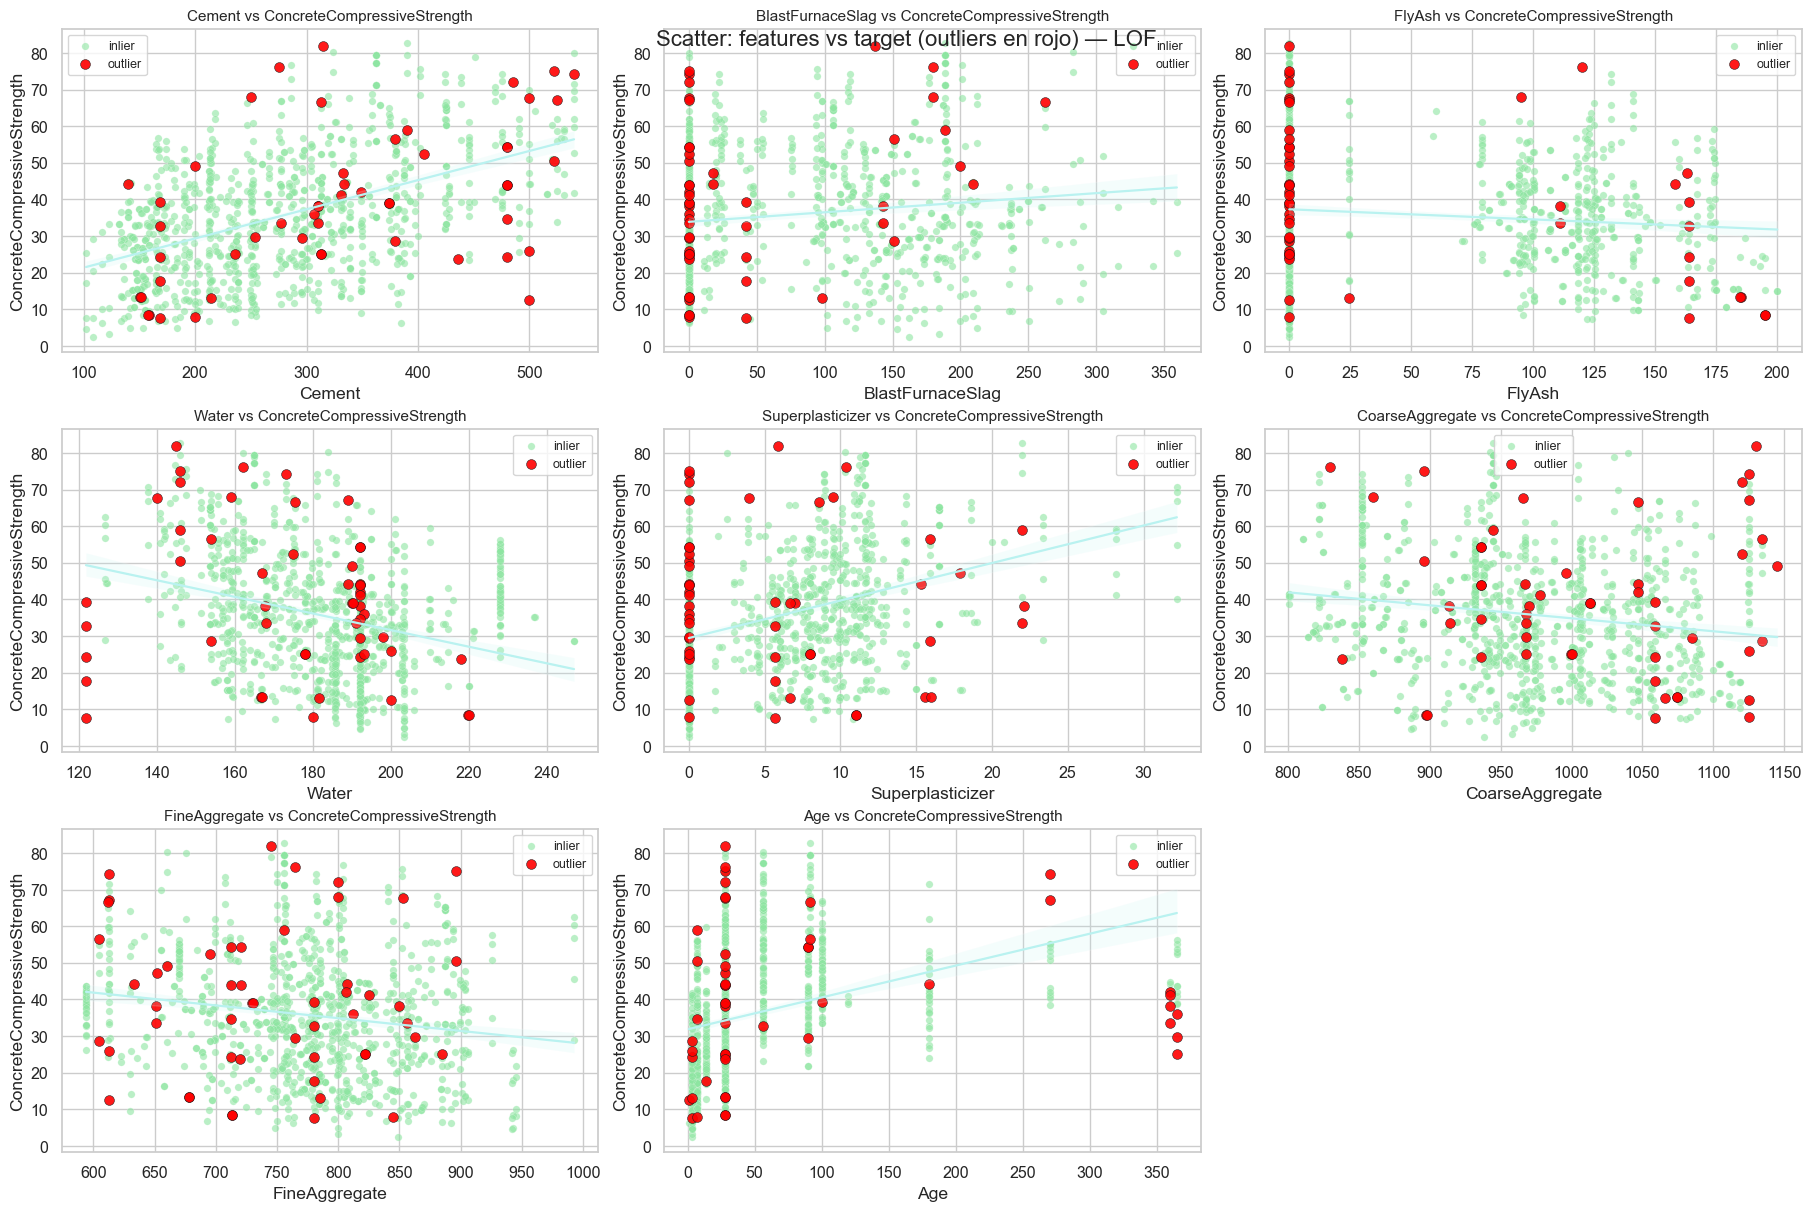

In [11]:
target = "ConcreteCompressiveStrength"
features_no_target = [c for c in features if c != target]
n2 = len(features_no_target)
rows2 = math.ceil(n2 / cols_per_row)

fig, axes = plt.subplots(rows2, cols_per_row, figsize=(18, 4*rows2), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features_no_target):
    ax = axes[i]
    # plot inliers
    sns.scatterplot(x=df.loc[~df["is_outlier"], feat], y=df.loc[~df["is_outlier"], target],
                    ax=ax, color=color_main, s=28, alpha=0.6, edgecolor="w", linewidth=0.2, label="inlier")
    # plot outliers in red
    sns.scatterplot(x=df.loc[df["is_outlier"], feat], y=df.loc[df["is_outlier"], target],
                    ax=ax, color="red", s=50, alpha=0.9, edgecolor="k", linewidth=0.4, label="outlier")
    # tendencia sobre todos los datos
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, line_kws={"color": color_accent, "linewidth":1.6})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.legend(loc="best", fontsize=9)

for j in range(n2, rows2*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Scatter: features vs target (outliers en rojo) — LOF", fontsize=16, y=0.98)
plt.show()

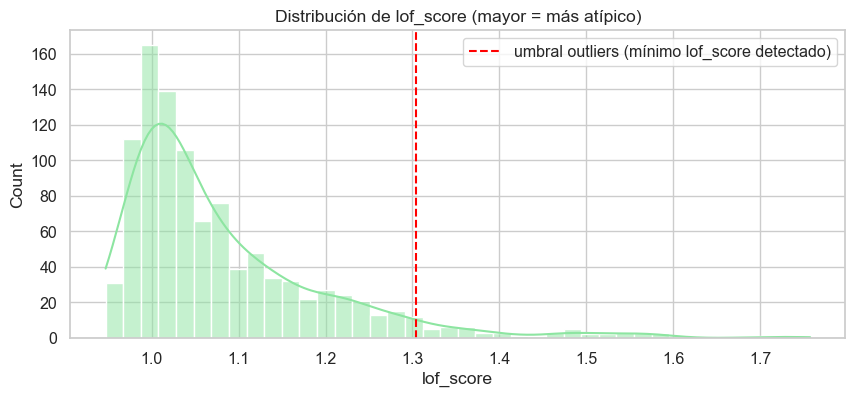

In [12]:
# Mapa de scores LOF (histograma + top outliers)
plt.figure(figsize=(10,4))
sns.histplot(df["lof_score"], bins=40, kde=True, color=color_main)
plt.title("Distribución de lof_score (mayor = más atípico)")
plt.xlabel("lof_score")
plt.axvline(df.loc[df['is_outlier'], 'lof_score'].min(), color="red", linestyle="--",
            label="umbral outliers (mínimo lof_score detectado)")
plt.legend()
plt.show()

In [13]:
# Crear DataFrame solo con outliers
df_outliers = df[df["is_outlier"]].copy()

# Guardar a CSV
outliers_path = "outliers_lof.csv"
df_outliers.to_csv(outliers_path, index=False)

print(f"Archivo con {len(df_outliers)} outliers guardado en: {outliers_path}")


Archivo con 52 outliers guardado en: outliers_lof.csv


In [14]:
# Hiperparámetros a probar
from itertools import product


X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

neighbors_grid = [3, 9, 15, 27, 49]
metric_grid = ['euclidean', 'manhattan', 'minkowski']
results = []

print("Iniciando búsqueda manual en rejilla...")

for n_neighbors, metric in product(neighbors_grid, metric_grid):

    # Crea la instancia de LOF con la combinación actual
    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        metric=metric,
        novelty=False
    )

    # Ajusta y predice
    y_pred = lof.fit_predict(X_scaled)

    # Calcula las métricas
    lof_score = -lof.negative_outlier_factor_
    n_outliers = (y_pred == -1).sum()

    # Calcula el score medio solo si se encontraron outliers
    mean_lof = lof_score[y_pred == -1].mean() if n_outliers > 0 else 0.0

    # Guarda los resultados
    results.append({
        "n_neighbors": n_neighbors,
        "metric": metric,
        "n_outliers": n_outliers,
        "mean_lof_score": mean_lof
    })

print("¡Búsqueda finalizada!")

df_grid = pd.DataFrame(results)


df_grid_sorted = df_grid.sort_values(by="mean_lof_score", ascending=False).reset_index(drop=True)

print("\n--- Top 10 Mejores Combinaciones (según Mean LOF Score) ---")
display(df_grid_sorted.head(10))

Iniciando búsqueda manual en rejilla...


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


¡Búsqueda finalizada!

--- Top 10 Mejores Combinaciones (según Mean LOF Score) ---


,n_neighbors,metric,n_outliers,mean_lof_score
0,3,manhattan,57,7.241936e+08
1,3,euclidean,53,6.437549e+08
2,3,minkowski,53,6.437549e+08
3,9,manhattan,56,1.785655e+00
4,9,euclidean,30,1.712149e+00
5,9,minkowski,30,1.712149e+00
6,15,manhattan,25,1.643208e+00
7,15,euclidean,15,1.597176e+00
8,15,minkowski,15,1.597176e+00
9,27,euclidean,7,1.593903e+00


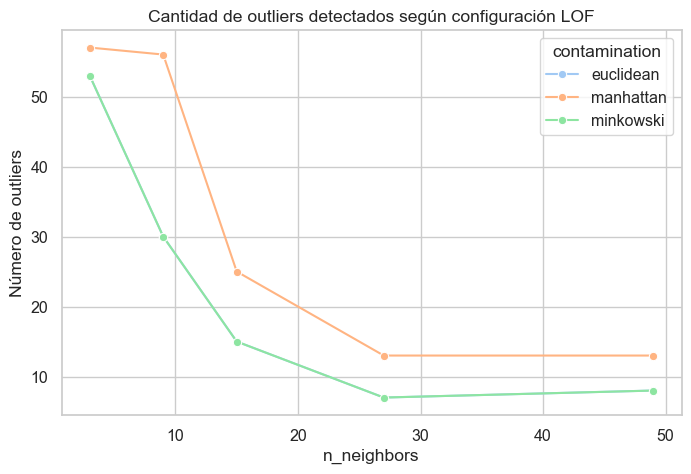

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_grid, x="n_neighbors", y="n_outliers",
             hue="metric", marker="o", palette="pastel")
plt.title("Cantidad de outliers detectados según configuración LOF")
plt.ylabel("Número de outliers")
plt.xlabel("n_neighbors")
plt.legend(title="contamination")
plt.show()


In [16]:
# Crear un DataFrame limpio sin outliers
df_clean = df[~df["is_outlier"]].copy()

print(f"Dataset original: {df.shape[0]} filas")
print(f"Outliers eliminados: {df['is_outlier'].sum()}")
print(f"Dataset limpio: {df_clean.shape[0]} filas")

# Vista rápida de los primeros registros
display(df_clean.head())


Dataset original: 1030 filas
Outliers eliminados: 52
Dataset limpio: 978 filas


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength,lof_score,is_outlier
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000,0.986356,False
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000,0.965025,False
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001,1.059604,False
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999,1.138188,False
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000,1.043368,False


In [17]:
df_clean.to_csv("concrete_cleanLOF.csv", index=False)


In [18]:
!pip install dmba # Data Mining for Business Analytics

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [19]:
# ===== Diagnóstico completo: OLS + t-values + VIF =====
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# (1) Cargar dataset limpio
df = pd.read_csv("concrete_cleanLOF.csv")

X = df.drop(columns=["ConcreteCompressiveStrength", "lof_score", "is_outlier"], errors="ignore")
y = df["ConcreteCompressiveStrength"]

# Separar tipos
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# (2) Normalizar numéricas
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X[num_cols]),
    columns=num_cols,
    index=X.index
)

# (3) One-hot encoding si hay categóricas
if cat_cols:
    X_cat = pd.get_dummies(X[cat_cols], drop_first=True)
    X_proc = pd.concat([X_num_scaled, X_cat], axis=1)
else:
    X_proc = X_num_scaled

# (4) Ajustar modelo OLS
X_proc_const = sm.add_constant(X_proc, has_constant="add")
ols = sm.OLS(y, X_proc_const)
res = ols.fit()

print("\n=== Resumen OLS ===")
print(res.summary())

print("\n=== t-values por coeficiente ===")
print(res.tvalues)

X_vif = sm.add_constant(X_proc)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print("\n=== VIF por variable ===")
print(vif_data)


ModuleNotFoundError: No module named 'statsmodels'


=== Evaluación inicial con Validación Cruzada (MAE) ===
Linear: MAE promedio = 7.9583 (+/- 0.3654)
Ridge: MAE promedio = 7.9629 (+/- 0.3627)
Lasso: MAE promedio = 8.5779 (+/- 0.2214)
ElasticNet: MAE promedio = 9.2574 (+/- 0.3784)

=== Ajuste de Hiperparámetros ===
Ridge -> Mejor MAE: 7.9584 | Params: {'regressor__alpha': 0.01}
Lasso -> Mejor MAE: 7.9589 | Params: {'regressor__alpha': 0.001}
ElasticNet -> Mejor MAE: 7.9595 | Params: {'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.8}


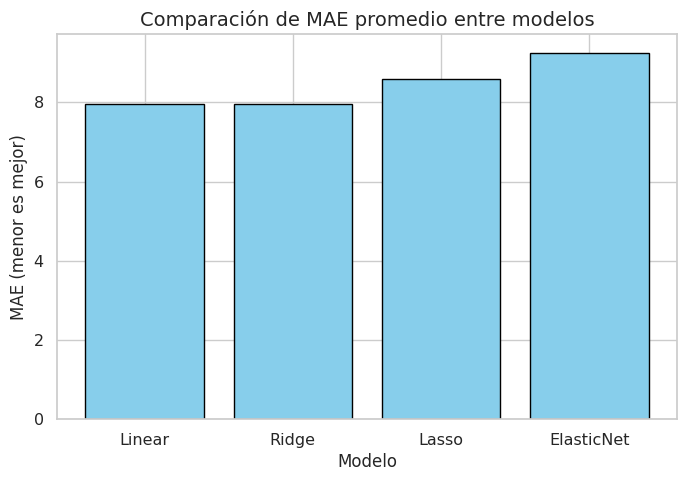

In [ ]:

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

num_pipe = Pipeline([
    ("scaler", StandardScaler())
])
cat_pipe = OneHotEncoder(drop="first", handle_unknown="ignore") if cat_cols else "drop"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ],
    remainder="drop"
)


models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42, max_iter=10000),
    "ElasticNet": ElasticNet(random_state=42, max_iter=10000)
}


print("\n=== Evaluación inicial con Validación Cruzada (MAE) ===")
mae_scores = {}
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    mae = -scores.mean()
    mae_scores[name] = mae
    print(f"{name}: MAE promedio = {mae:.4f} (+/- {scores.std():.4f})")


param_grids = {
    "Ridge": {"regressor__alpha": [0.01, 0.1, 1, 10, 100]},
    "Lasso": {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {
        "regressor__alpha": [0.001, 0.01, 0.1, 1, 10],
        "regressor__l1_ratio": [0.2, 0.5, 0.8]
    }
}

print("\n=== Ajuste de Hiperparámetros ===")
best_models = {}
for name, grid in param_grids.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", models[name])
    ])
    search = GridSearchCV(pipe, grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
    search.fit(X, y)
    best_models[name] = search.best_estimator_
    print(f"{name} -> Mejor MAE: {-search.best_score_:.4f} | Params: {search.best_params_}")


df_scores = pd.DataFrame(list(mae_scores.items()), columns=["Modelo", "MAE"])
plt.figure(figsize=(8, 5))
plt.bar(df_scores["Modelo"], df_scores["MAE"], color="skyblue", edgecolor="black")
plt.title("Comparación de MAE promedio entre modelos", fontsize=14)
plt.ylabel("MAE (menor es mejor)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.show()



=== Baseline (todas las variables): Evaluación inicial (CV MAE) ===
Linear: MAE = 7.9583 (+/- 0.3654)
Ridge: MAE = 7.9629 (+/- 0.3627)
Lasso: MAE = 8.5779 (+/- 0.2214)
ElasticNet: MAE = 9.2574 (+/- 0.3784)

=== Baseline (todas las variables): GridSearch (CV MAE) ===
Ridge -> best MAE: 7.9584 | params: {'regressor__alpha': 0.01}
Lasso -> best MAE: 7.9589 | params: {'regressor__alpha': 0.001}
ElasticNet -> best MAE: 7.9595 | params: {'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.8}

Variables eliminadas en versión reducida: ['CoarseAggregate', 'FineAggregate']

=== Reducido (sin agregados grueso/fino): Evaluación inicial (CV MAE) ===
Linear: MAE = 7.9651 (+/- 0.3614)
Ridge: MAE = 7.9664 (+/- 0.3592)
Lasso: MAE = 8.5907 (+/- 0.2477)
ElasticNet: MAE = 9.3880 (+/- 0.4021)

=== Reducido (sin agregados grueso/fino): GridSearch (CV MAE) ===
Ridge -> best MAE: 7.9651 | params: {'regressor__alpha': 0.01}
Lasso -> best MAE: 7.9652 | params: {'regressor__alpha': 0.001}
ElasticNet -> best MA

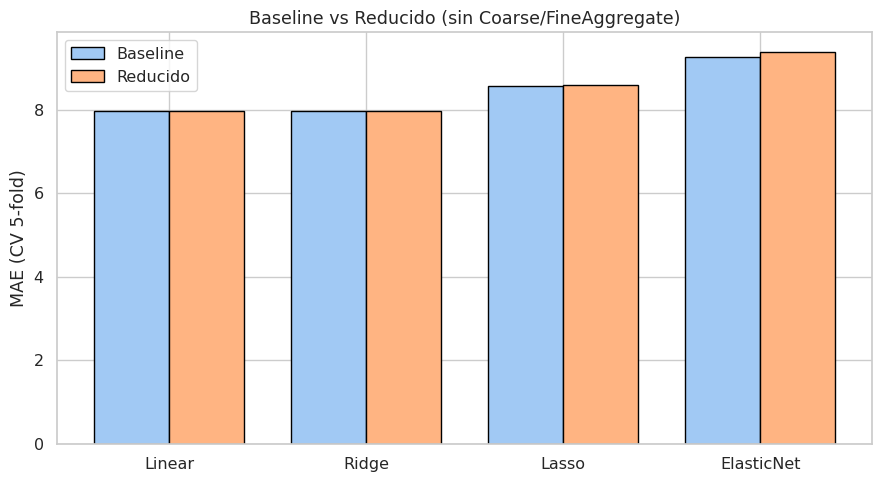


🏁 Mejor baseline: Linear (MAE=7.9583)
🏁 Mejor reducido: Linear (MAE=7.9651)
ℹ️ La versión reducida no mejora (o empata). Mantén el baseline o considera regularización.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

df = pd.read_csv("concrete_cleanLOF.csv")
X_full = df.drop(columns=["ConcreteCompressiveStrength", "lof_score", "is_outlier"], errors="ignore")
y = df["ConcreteCompressiveStrength"]

def build_preprocessor(X):
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

    num_pipe = Pipeline([("scaler", StandardScaler())])
    cat_pipe = OneHotEncoder(drop="first", handle_unknown="ignore") if cat_cols else "drop"

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols),
        ],
        remainder="drop",
    )
    return preprocessor, num_cols, cat_cols

def eval_models(X, y, title):
    preprocessor, num_cols, cat_cols = build_preprocessor(X)

    models = {
        "Linear": LinearRegression(),
        "Ridge": Ridge(random_state=42),
        "Lasso": Lasso(random_state=42, max_iter=10000),
        "ElasticNet": ElasticNet(random_state=42, max_iter=10000),
    }

    print(f"\n=== {title}: Evaluación inicial (CV MAE) ===")
    mae_scores = {}
    for name, model in models.items():
        pipe = Pipeline([("preprocessor", preprocessor), ("regressor", model)])
        scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
        mae_scores[name] = -scores.mean()
        print(f"{name}: MAE = {-scores.mean():.4f} (+/- {scores.std():.4f})")

    param_grids = {
        "Ridge": {"regressor__alpha": [0.01, 0.1, 1, 10, 100]},
        "Lasso": {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10]},
        "ElasticNet": {
            "regressor__alpha": [0.001, 0.01, 0.1, 1, 10],
            "regressor__l1_ratio": [0.2, 0.5, 0.8],
        },
    }

    print(f"\n=== {title}: GridSearch (CV MAE) ===")
    best_models = {}
    for name, grid in param_grids.items():
        pipe = Pipeline([("preprocessor", preprocessor), ("regressor", models[name])])
        search = GridSearchCV(pipe, grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
        search.fit(X, y)
        best_models[name] = search.best_estimator_
        print(f"{name} -> best MAE: {-search.best_score_:.4f} | params: {search.best_params_}")

    return mae_scores, best_models

baseline_mae, baseline_best = eval_models(X_full, y, "Baseline (todas las variables)")

drop_cols = [c for c in ["CoarseAggregate", "FineAggregate"] if c in X_full.columns]
X_reduced = X_full.drop(columns=drop_cols, errors="ignore")

print("\nVariables eliminadas en versión reducida:", drop_cols or "(ninguna)")

reduced_mae, reduced_best = eval_models(X_reduced, y, "Reducido (sin agregados grueso/fino)")

df_plot = pd.DataFrame({
    "Modelo": ["Linear","Ridge","Lasso","ElasticNet"],
    "Baseline_MAE": [baseline_mae.get(m) for m in ["Linear","Ridge","Lasso","ElasticNet"]],
    "Reducido_MAE": [reduced_mae.get(m) for m in ["Linear","Ridge","Lasso","ElasticNet"]],
})
print("\n=== Comparación MAE (menor es mejor) ===")
print(df_plot)

plt.figure(figsize=(9,5))
x = np.arange(len(df_plot))
width = 0.38
plt.bar(x - width/2, df_plot["Baseline_MAE"], width, edgecolor="black", label="Baseline")
plt.bar(x + width/2, df_plot["Reducido_MAE"], width, edgecolor="black", label="Reducido")
plt.xticks(x, df_plot["Modelo"])
plt.ylabel("MAE (CV 5-fold)")
plt.title("Baseline vs Reducido (sin Coarse/FineAggregate)")
plt.legend()
plt.tight_layout()
plt.show()

def best_key(d): return min(d, key=d.get)

best_baseline = best_key(baseline_mae)
best_reduced = best_key(reduced_mae)
print(f"\n Mejor baseline: {best_baseline} (MAE={baseline_mae[best_baseline]:.4f})")
print(f" Mejor reducido: {best_reduced} (MAE={reduced_mae[best_reduced]:.4f})")

if reduced_mae[best_reduced] + 1e-6 < baseline_mae[best_baseline]:
    print("La versión reducida mejora el MAE. Mantén el modelo reducido.")
else:
    print(" La versión reducida no mejora (o empata). Mantén el baseline o considera regularización.")



=== Ranking combinado (MI y F-test) ===
            feature  MI_score     F_score       p_value
0               Age  0.389558  146.745599  1.446318e-31
1             Water  0.383312   89.791295  1.936938e-20
2            Cement  0.313771  318.085658  8.394922e-62
3   CoarseAggregate  0.263248   32.594909  1.505587e-08
4     FineAggregate  0.242404   29.949663  5.637259e-08
5  Superplasticizer  0.236545  187.083340  4.315476e-39
6  BlastFurnaceSlag  0.201793   16.661989  4.831987e-05
7            FlyAsh  0.136625    7.238381  7.258011e-03

Top por MI:
            feature  MI_score
7               Age  0.389558
3             Water  0.383312
0            Cement  0.313771
5   CoarseAggregate  0.263248
6     FineAggregate  0.242404
4  Superplasticizer  0.236545
1  BlastFurnaceSlag  0.201793
2            FlyAsh  0.136625

Top por F-score:
            feature     F_score       p_value
0            Cement  318.085658  8.394922e-62
4  Superplasticizer  187.083340  4.315476e-39
7               

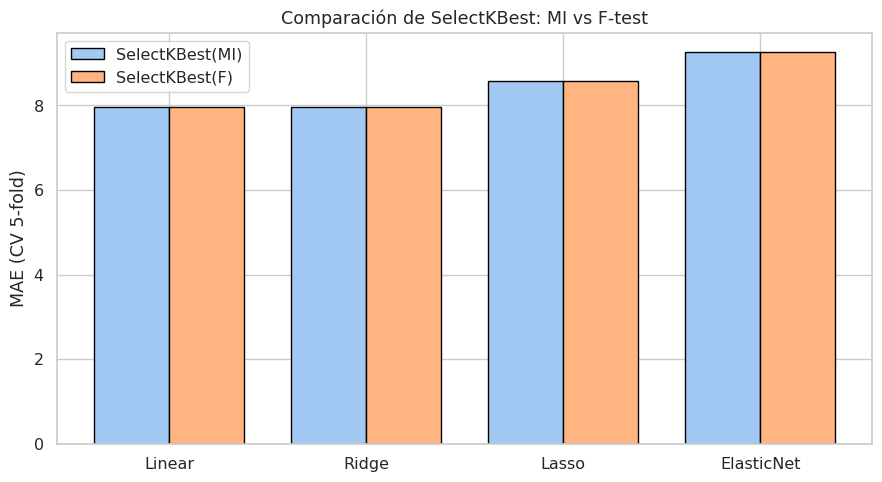


🏁 Mejor con MI: Linear (MAE=7.9583) | Features: ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age']
🏁 Mejor con F : Linear  (MAE=7.9583)  | Features: ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age']


In [ ]:
# ===== MI vs F-test: análisis de relevancia + pipelines con SelectKBest =====
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


df = pd.read_csv("concrete_cleanLOF.csv")
X = df.drop(columns=["ConcreteCompressiveStrength", "lof_score", "is_outlier"], errors="ignore")
y = df["ConcreteCompressiveStrength"]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()


scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index)

if cat_cols:
    X_cat = pd.get_dummies(X[cat_cols], drop_first=True)
    X_scoring = pd.concat([X_num_scaled, X_cat], axis=1)
else:
    X_scoring = X_num_scaled.copy()

# -----------------------------------------
# 2) Scores de relevancia: MI y F-test
# -----------------------------------------
# MI: no lineal; establecemos random_state para reproducibilidad
mi = mutual_info_regression(X_scoring, y, random_state=42)
mi_df = pd.DataFrame({"feature": X_scoring.columns, "MI_score": mi}).sort_values("MI_score", ascending=False)

# F-test: lineal; devuelve F y p-value
F, p = f_regression(X_scoring, y)
f_df = pd.DataFrame({"feature": X_scoring.columns, "F_score": F, "p_value": p}).sort_values("F_score", ascending=False)

# Merge para ver lado a lado
scores = (mi_df.merge(f_df, on="feature")
                .sort_values(["MI_score", "F_score"], ascending=False)
                .reset_index(drop=True))

print("\n=== Ranking combinado (MI y F-test) ===")
print(scores)

print("\nTop por MI:")
print(mi_df.head(10))
print("\nTop por F-score:")
print(f_df.head(10))

# -----------------------------------------
# 3) Pipelines con SelectKBest(MI/F) + modelos
# -----------------------------------------
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

def build_preprocessor(X_):
    num_cols_ = X_.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols_ = X_.select_dtypes(include=["object", "category"]).columns.tolist()
    num_pipe = Pipeline([("scaler", StandardScaler())])
    cat_pipe = OneHotEncoder(drop="first", handle_unknown="ignore") if cat_cols_ else "drop"
    pre = ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols_),
            ("cat", cat_pipe, cat_cols_),
        ],
        remainder="drop",
    )
    return pre, num_cols_, cat_cols_

def get_feature_names_after_preprocessor(pre, num_cols_, cat_cols_):
    names = []
    # num: StandardScaler no cambia nombres
    if "num" in pre.named_transformers_ and pre.named_transformers_["num"] != "drop":
        names.extend(num_cols_)
    # cat: OHE genera nuevos nombres
    if cat_cols_ and pre.named_transformers_["cat"] != "drop":
        ohe = pre.named_transformers_["cat"]
        names.extend(ohe.get_feature_names_out(cat_cols_).tolist())
    return names

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42, max_iter=10000),
    "ElasticNet": ElasticNet(random_state=42, max_iter=10000),
}

pre, ncols, ccols = build_preprocessor(X)

# Estimamos dimensión post-prepro para elegir k razonables
_ = pre.fit(X)
try:
    out_dim = pre.transform(X.iloc[:50]).shape[1]
except Exception:
    out_dim = len(ncols)

def k_candidates(out_dim_):
    base = [3, 5, 7, 8, 10, 12]
    return [k for k in base if k <= max(3, out_dim_)]

k_list = k_candidates(out_dim)

def run_selector_grid(score_func, label):
    print(f"\n=== GridSearch con SelectKBest({label}) ===")
    pipe = Pipeline(steps=[
        ("preprocessor", pre),
        ("select", SelectKBest(score_func=score_func, k="all")),
        ("regressor", LinearRegression())
    ])

    param_grid = [
        {"select__k": k_list, "regressor": [LinearRegression()]},
        {"select__k": k_list, "regressor": [Ridge(random_state=42)],
         "regressor__alpha": [0.01, 0.1, 1, 10, 100]},
        {"select__k": k_list, "regressor": [Lasso(random_state=42, max_iter=10000)],
         "regressor__alpha": [0.001, 0.01, 0.1, 1, 10]},
        {"select__k": k_list, "regressor": [ElasticNet(random_state=42, max_iter=10000)],
         "regressor__alpha": [0.001, 0.01, 0.1, 1, 10],
         "regressor__l1_ratio": [0.2, 0.5, 0.8]},
    ]

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=mae_scorer,
        cv=5,
        n_jobs=-1
    )
    gs.fit(X, y)

    print(f"Mejor MAE (CV): {-gs.best_score_:.4f} | Params: {gs.best_params_}")

    # Extra: ¿qué features quedaron?
    best = gs.best_estimator_
    fitted_pre = best.named_steps["preprocessor"]
    feats_all = get_feature_names_after_preprocessor(fitted_pre, ncols, ccols)
    selector = best.named_steps["select"]
    mask = selector.get_support()
    feats_selected = [f for f, keep in zip(feats_all, mask) if keep]
    print(f"Features seleccionadas ({label}, k={selector.k}): {feats_selected}")

    # MAE por modelo usando ese mejor pipeline
    model_mae = {}
    for mname in models.keys():
        # clonar configuración pero cambiando solo el regressor
        cfg = best.get_params()
        cfg["regressor"] = models[mname]
        tuned = Pipeline([
            ("preprocessor", pre),
            ("select", SelectKBest(score_func=score_func, k=selector.k)),
            ("regressor", cfg["regressor"])
        ])
        # Nota: sin re-tunear hiperparámetros aquí; es comparativo puro
        cv_scores = cross_val_score(tuned, X, y, cv=5, scoring=mae_scorer, n_jobs=-1)
        model_mae[mname] = -cv_scores.mean()

    print(f"MAE por modelo con {label} (k={selector.k}): {model_mae}")
    return gs, feats_selected, model_mae

gs_mi, feats_mi, mae_mi = run_selector_grid(mutual_info_regression, "MI")
gs_f,  feats_f,  mae_f  = run_selector_grid(f_regression, "F-test")

# ------------------------------
# 4) Comparación visual rápida
# ------------------------------
df_plot = pd.DataFrame({
    "Modelo": list(models.keys()),
    "MAE_MI": [mae_mi[m] for m in models.keys()],
    "MAE_F":  [mae_f[m]  for m in models.keys()],
})
print("\n=== Comparación MAE por modelo (MI vs F-test) ===")
print(df_plot)

plt.figure(figsize=(9,5))
x = np.arange(len(df_plot))
w = 0.38
plt.bar(x - w/2, df_plot["MAE_MI"], w, edgecolor="black", label="SelectKBest(MI)")
plt.bar(x + w/2, df_plot["MAE_F"],  w, edgecolor="black", label="SelectKBest(F)")
plt.xticks(x, df_plot["Modelo"])
plt.ylabel("MAE (CV 5-fold)")
plt.title("Comparación de SelectKBest: MI vs F-test")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 5) Ganadores globales
# ------------------------------
best_mi = min(mae_mi, key=mae_mi.get)
best_f  = min(mae_f,  key=mae_f.get)
print(f"\n🏁 Mejor con MI: {best_mi} (MAE={mae_mi[best_mi]:.4f}) | Features: {feats_mi}")
print(f"🏁 Mejor con F : {best_f}  (MAE={mae_f[best_f]:.4f})  | Features: {feats_f}")
